# 기계학습에서 불균형 데이터를 처리하는 imbalanced-learn
---
기계학습(Machine Learning) 작업을 진행하다 보면, 불균형 데이터(Imbalanced Data) 문제에 맞닥뜨리는 일이 종종 생깁니다. 예를 들어, 강아지와 고양이를 구분하는 모델을 구현한다고 하면 항상 강아지와 고양이 사진이 1:1 비율로 확보되지는 않습니다. 이 때 기계학습 모델이 한쪽의 클래스 정보에 편향된 학습을 하는 문제가 발생하는데, 문제는 이런 모델이 분류나 예측 등의 결과마저도 편향되는 상황이 일어납니다.
</p></br></br>

<center><img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_001.png"><br><strong>[그림 1]</strong> 의사결정나무 모델의 불균형 데이터 학습 결과 차이 <a href="https://imbalanced-learn.org/stable/introduction.html#problem-statement-regarding-imbalanced-data-sets">(출처)</a></center>
</p></br></br>

그래서, 이런 문제를 해결하기 위해 데이터 샘플링(Data Sampling) 과정을 거칩니다. 데이터 샘플링은 특정 편향 문제를 해결할 수 있지만, 종류에 따라 예상치 못한 문제가 일어날 수도 있으니 신중하게 사용해야 합니다.
</br>
파이썬(Python)에서는 불균형 데이터를 전문적으로 처리할 수 있는 패키지로 [imbalanced-learn](https://imbalanced-learn.org/)이 있습니다. 아래에 어떤 불균형 데이터를 불러온 뒤, imbalanced-learn을 이용해 균형을 맞추고 학습하는 과정을 구현해 보겠습니다.
</p></br></br>


In [1]:
# import package
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=5, weights=[0.99], flip_y=0, random_state=1234)
print(Counter(y))

Counter({0: 9900, 1: 100})


</p></br></br>

## Random Undersampling
---
언더샘플링(Undersampling)이란, 가장 개수가 적은 클래스를 제외한 나머지 모든 클래스의 개수를 줄이는 과정입니다. 데이터를 삭제한다는 특성상 손쉽게 불균형 데이터 문제를 해결할 수 있지만, 원본값에 비해서 손실이 일어나기 때문에 신중하게 선택해야 하는 방법이지요. 여기서는 그중에서 가장 개수가 적은 클래스를 제외하고는 무작위로 데이터를 삭제하는 방법인 랜덤 언더샘플링(Random Undersampling)을 구현해 보겠습니다. 해당 기능은 `imblearn.under_sampling.RandomUnderSampler`로 구현할 수 있습니다.
</p></br></br>


In [2]:
# random undersampling
undersample = RandomUnderSampler(random_state=12345)
X_undersampled, y_undersampled = undersample.fit_resample(X, y)
print(Counter(y_undersampled))

Counter({0: 100, 1: 100})


</p></br></br>

랜덤 언더샘플링을 수행한 결과, 9900:100이었던 각 클래스의 비율이 100:100으로 조절된 것을 확인할 수 있습니다. 비율은 서로 맞아떨어지게 되면서 불균형 문제는 해결되었지만, 9800개의 클래스 0 데이터가 손실되었다는 문제가 발생합니다.
</p></br></br>

## Random Oversampling
---
언더샘플링과 같이 데이터를 삭제하는 방법이 큰 문제를 일으킨다면, 반대 개념인 오버샘플링(Oversampling)을 이용해볼 수 있습니다. 이는 말 그대로 소수 클래스의 개수를 늘리는 과정입니다. 하지만, 방법의 특성상 없던 데이터를 생성하는 것이기 때문에 왜곡이 발생할 수 있다는 단점이 있습니다. 이번에는 무작위 증강을 활용하는 랜덤 오버샘플링(Random Oversampling)을 구현해 보겠습니다. 해당 기능은 `imblearn.under_sampling.RandomOverSampler`으로 구현 가능합니다.
</p></br></br>


In [3]:
# random oversampling
oversample = RandomOverSampler(random_state=12345)
X_oversampled, y_oversampled = oversample.fit_resample(X, y)
print(Counter(y_oversampled))

Counter({0: 9900, 1: 9900})


</p></br></br>

랜덤 오버샘플링 결과, 클래스 비율이 9900:100에서 9900:9900으로 변한걸 확인할 수 있습니다. 없던 데이터가 생성되기 때문에 9800개의 클래스 1 데이터가 기존 정보를 왜곡할 수 있다는 문제가 발생하게 되는데, 이 때 문제를 어느정도 줄이기 위해서 오버샘플링을 하는 비율을 조절해볼 수 있습니다.
</br>
`RandomOverSampler`를 이용할 때, sampling_strategy 매개변수를 0에서 1 사이의 값으로 입력할 수 있습니다. 이 값은 `(소수 집단 데이터수 / 다수 집단 데이터수)`의 값을 나타냅니다. 예를 들어, 0.5로 설정한 경우에는 소수 집단인 클래스를 9900 * 0.5 = 4950개 까지만 늘리게 됩니다.
</p></br></br>


In [4]:
# random oversampling, sampling_strategy=0.5
oversample = RandomOverSampler(random_state=12345, sampling_strategy=0.5)
X_resampled, y_resampled = oversample.fit_resample(X, y)
print(Counter(y_resampled))

Counter({0: 9900, 1: 4950})


</p></br></br>

## SMOTE Oversampling
---
앞서 실행한 랜덤 오버샘플링의 경우, 각각의 샘플과 동일한 값을 복사하는 방식입니다. 이 경우, 동일한 값이 여러개 생성되기 때문에 각 값의 가중치가 지나치게 높아진다는 단점이 발생하게 됩니다. 그래서, 각 샘플과 유사한 값을 생성하는 방식으로 SMOTE* 등의 방법이 제안되고 있습니다.
</p></br></br>

<center><img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_004.png"><br><strong>[그림 2]</strong> 오버샘플링 기법의 차이 도식화 <a href="https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn">(출처)</a></center>
</p></br></br>

그래서, 이번에는 `imblearn.over_sampling.SMOTE`를 이용해 SMOTE 오버샘플링 기법을 구현해 보겠습니다. 대상은 앞서 이용한 데이터를 그대로 사용합니다.
</p></br></br>

* Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002): 321-357.
</p></br></br>


In [5]:
# SMOTE oversampling
smote_sample = SMOTE(random_state=12345, sampling_strategy=0.5)
X_smote, y_smote = smote_sample.fit_resample(X, y)
print(Counter(y_smote))

Counter({0: 9900, 1: 4950})


</p></br></br>

## 샘플링 결과 비교하기
---
위에서 이용한 언더샘플링과 오버샘플링 결과는 방법에 따라 데이터의 형태에 차이가 발생합니다. 아래에 각 샘플링 결과별로 발생하는 차이를 도표로 그려놓을테니, 각 방법에 따른 차이를 제대로 인지하고 목적에 맞는 샘플링을 이용해 보시기 바랍니다.
</p></br></br>


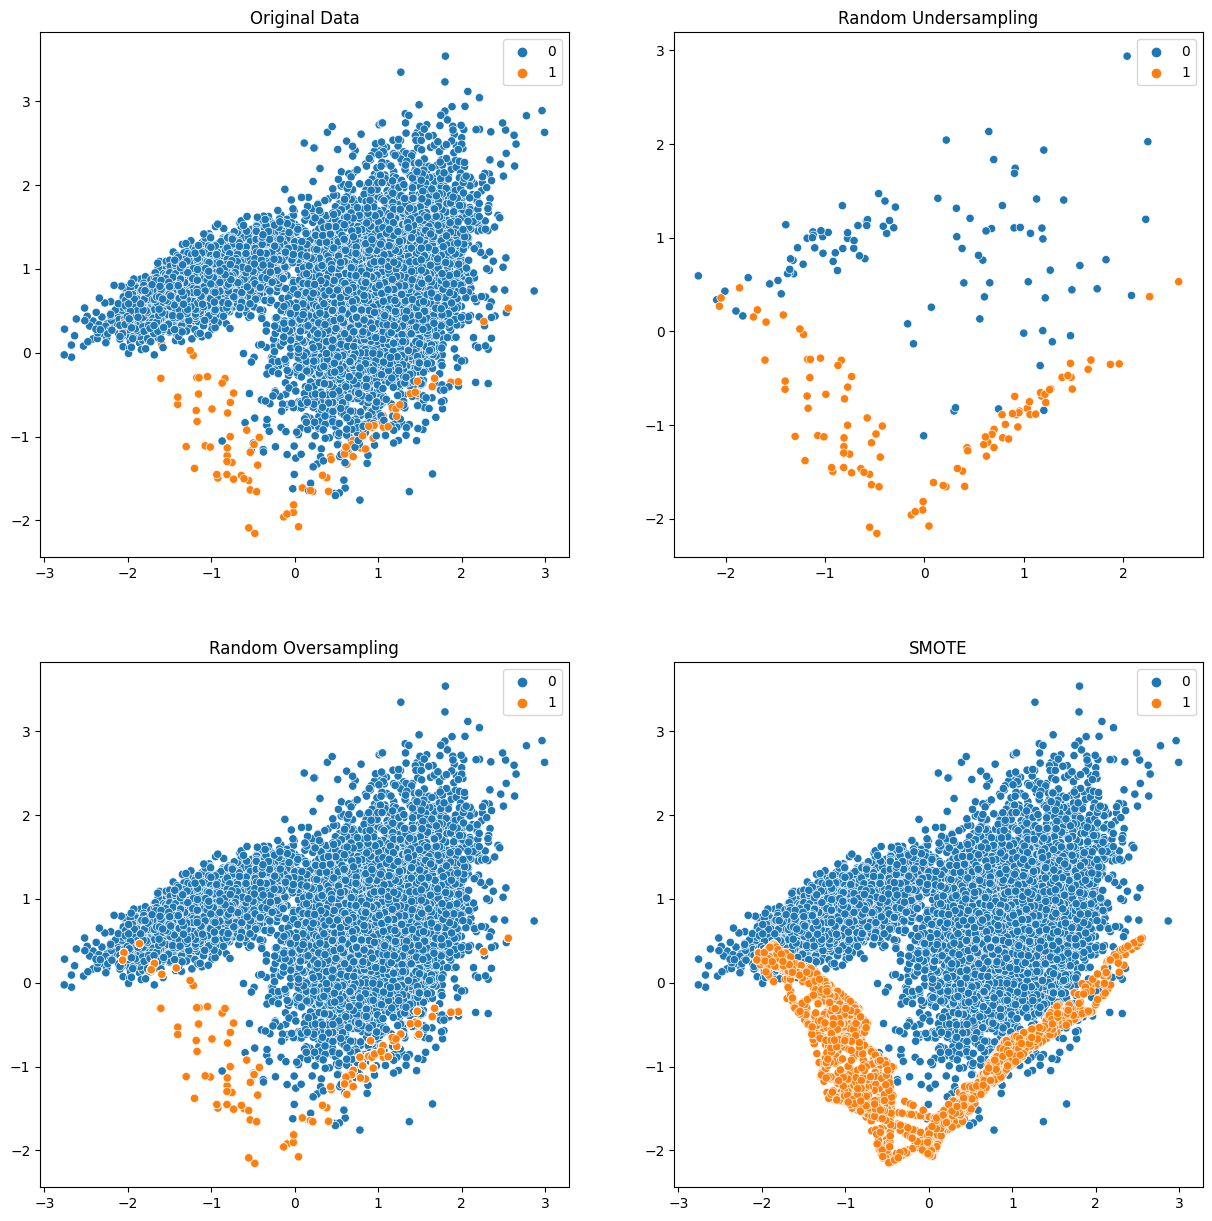

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, ax=axes[0][0])
axes[0][0].set_title('Original Data')
sns.scatterplot(x=X_undersampled[:, 1], y=X_undersampled[:,2], hue=y_undersampled, ax=axes[0][1])
axes[0][1].set_title('Random Undersampling')
sns.scatterplot(x=X_oversampled[:, 1], y=X_oversampled[:, 2], hue=y_oversampled, ax=axes[1][0])
axes[1][0].set_title('Random Oversampling')
sns.scatterplot(x=X_smote[:, 1], y=X_smote[:, 2], hue=y_smote, ax=axes[1][1])
axes[1][1].set_title('SMOTE')
plt.show()